In [1]:
# First we do a set of imports
import csv
from pprint import pprint
import cinnabar
from cinnabar import plotting as cinnabar_plotting
from cinnabar import femap, stats

In [7]:
# read in the experimental data

experimental_data = {}
experimental_filename = 'experimental_core1.tsv'

with open(experimental_filename, 'r') as fd:
    rd = csv.reader(fd, delimiter="\t", quotechar='"')
    headers = next(rd)
    for row in rd:
        experimental_data[row[0]] = {}
        experimental_data[row[0]]['dG'] = float(row[1])
        experimental_data[row[0]]['ddG'] = float(row[2])

pprint(experimental_data)

{'lig_1': {'dG': -8.56, 'ddG': 0.0},
 'lig_2': {'dG': -9.08, 'ddG': 0.0},
 'lig_3': {'dG': -9.85, 'ddG': 0.0},
 'lig_4': {'dG': -9.39, 'ddG': 0.0},
 'lig_5': {'dG': -10.91, 'ddG': 0.0},
 'lig_6': {'dG': -9.64, 'ddG': 0.0},
 'lig_7': {'dG': -10.37, 'ddG': 0.0},
 'lig_8': {'dG': -9.35, 'ddG': 0.0},
 'lig_9': {'dG': -10.17, 'ddG': 0.0}}


In [8]:
# Read in calculated results

calculated_data = {}
calculated_filename = './final_results_core1_1to9_star.tsv'

with open(calculated_filename, 'r') as fd:
    rd = csv.reader(fd, delimiter="\t", quotechar='"')
    headers = next(rd)
    for row in rd:
        tag = row[0] + "->" + row[1]
        calculated_data[tag] = {}
        calculated_data[tag]['ligand_i'] = row[0]
        calculated_data[tag]['ligand_j'] = row[1]
        calculated_data[tag]['dG'] = float(row[2])
        calculated_data[tag]['ddG'] = float(row[3])

pprint(calculated_data)

{'lig_1->lig_2': {'dG': -1.2233333333333336,
                  'ddG': 0.7099530500908724,
                  'ligand_i': 'lig_1',
                  'ligand_j': 'lig_2'},
 'lig_1->lig_3': {'dG': -1.52,
                  'ddG': 0.1039230484541327,
                  'ligand_i': 'lig_1',
                  'ligand_j': 'lig_3'},
 'lig_1->lig_4': {'dG': -0.65,
                  'ddG': 0.6148983655857285,
                  'ligand_i': 'lig_1',
                  'ligand_j': 'lig_4'},
 'lig_1->lig_5': {'dG': -3.243333333333333,
                  'ddG': 0.5033222956847162,
                  'ligand_i': 'lig_1',
                  'ligand_j': 'lig_5'},
 'lig_1->lig_6': {'dG': -1.5566666666666664,
                  'ddG': 1.5800421935294433,
                  'ligand_i': 'lig_1',
                  'ligand_j': 'lig_6'},
 'lig_1->lig_7': {'dG': -1.81,
                  'ddG': 0.5058655947976695,
                  'ligand_i': 'lig_1',
                  'ligand_j': 'lig_7'},
 'lig_1->lig_8': {'dG': -1.11

In [9]:
cinnabar_filename = './cinnabar_input_core1_1to9_star.csv'

with open(cinnabar_filename, 'w') as f:
    f.write("# Experimental block\n")
    f.write("# Ligand, expt_DDG, expt_dDDG\n")
    for entry in experimental_data:
        dG = experimental_data[entry]['dG']
        ddG = experimental_data[entry]['ddG']
        f.write(f"{entry},{dG:.2f},{ddG:.2f}\n")
    f.write('\n')
    f.write('# Calculated block\n')
    f.write('# Ligand1,Ligand2,calc_DDG,calc_dDDG(MBAR),calc_dDDG(additional)\n')
    for entry in calculated_data:
        dG = calculated_data[entry]['dG']
        ddG = calculated_data[entry]['ddG']
        molA = calculated_data[entry]['ligand_i']
        molB = calculated_data[entry]['ligand_j']
        f.write(f"{molA},{molB},{dG:.2f},0,{ddG:.2f}\n")

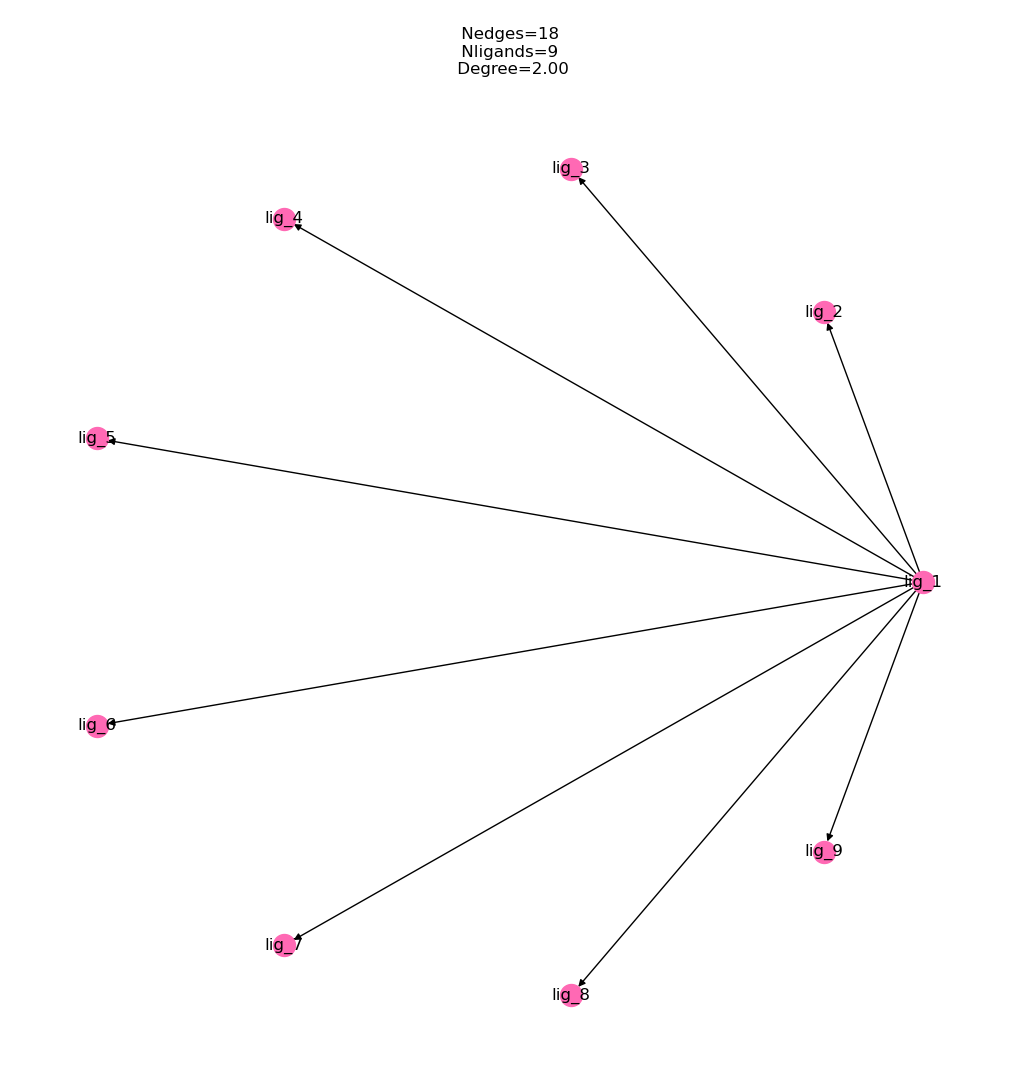

In [10]:
fe = femap.FEMap.from_csv('./cinnabar_input_core1_1to9_star.csv')
fe.generate_absolute_values()  # Get MLE generated estimates of the absolute values
fe.draw_graph()

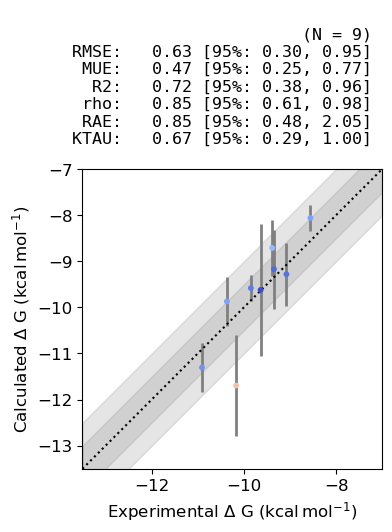

In [11]:
data = femap.read_csv('./cinnabar_input_core1_1to9_star.csv')
exp_DG_sum = sum([data['Experimental'][i].DG for i in data['Experimental'].keys()])
shift = exp_DG_sum / len(data['Experimental'].keys())

cinnabar_plotting.plot_DGs(fe.to_legacy_graph(), figsize=5,  shift=shift.m, filename='./core1_star_1to9.svg', xy_lim=[-13.5,-7])